In [9]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

# 사진 넣으면 그림 그려주는 함수

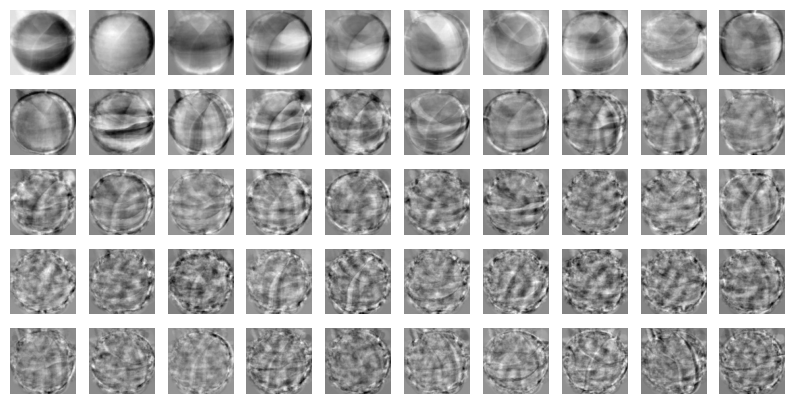

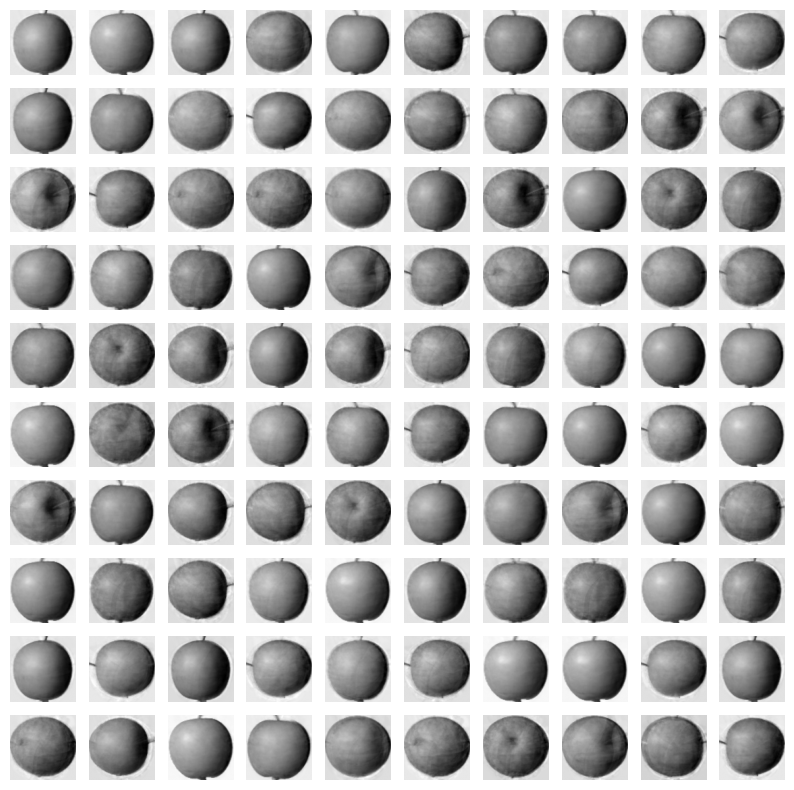

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645189, 0.00578896, 0.00511201, 0.00486382, 0.00480347,
       0.00447837, 0.00437317, 0.00408037, 0.00389467, 0.00372432,
       0.00359283, 0.00331453, 0.00317839, 0.00304309, 0.00303769,
       0.00288898, 0.00275897, 0.0026492 , 0.00255835, 0.0025214 ,
       0.0024723 , 0.00239107, 0.00229971, 0.0022192 , 0.00216929,
       0.00213457, 0.00196486, 0.0019199 , 0.00190791, 0.00185011,
       0.00181133, 0.00172753, 0.0016773 , 0.00163298, 0.00160058])

In [18]:
# 주성분 분석
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) # 3->2차원으로 변경

from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 만개짜리 특성 갖고 있는데 >> 비슷한 것끼리 묶어서 50개로 만들란 것
pca.fit(fruits_2d) # 학습
pca.components_.shape

draw_fruits(pca.components_.reshape(-1, 100, 100))

# 원본 데이터 압축하기
fruits_pca = pca.transform(fruits_2d) # 원본 데이터를 투영하기
fruits_pca.shape
# > (300, 50) : 원래 300장 사진이 10000개 특성 갖고 있었는데, 만개를 50개 될 때까지 압축한 것
    # -> 만개 중 50개만 써도 되는 식으로 데이터 줄인 것 -> 그만큼 저장 공간 줄어든 것

# 원본 데이터 복원하기
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape
# (300, 10000)

f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[:100])
    # 압축했다 원복하고 다시 그림그리기 -> 근데 노이즈 낀 것처럼 나옴
    # 핵심: 원복 가능하단 것 -> 이는 압축할 때 비슷한 특성끼리 잘 묶였기 때문

np.sum(pca.explained_variance_ratio_) # 원본의 92%를 갖고 있다고 나옴
pca.explained_variance_ratio_ # 여러 픽셀 뭉친 하나의 픽셀은 42% 정도의 구분을 할 수 있다고 나옴
    # 초반 10개 정도만으로도 데이터 잘 설명한단 것


In [23]:
# 특성 줄였는데도 유의미한가 검증하기
# 로지스틱 회귀 활용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100) # 0~2까지 3개 과일 들어있으니까 타깃 만들어야 함

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(scores)
# 만개짜리 잘 학습했음 확인 가능 -> 연산 속도 0.19868612큼 나옴

# 압축한 버전 넣어보기
scores2 = cross_validate(lr, fruits_pca, target)
print(scores2)
# 50개 짜리 학습했을 때 걸린 시간: 0.01155424걸림
    # 주성분 학습 활용하면 대용량 데이터 연산 속도 크게 단축할 수 있음

{'fit_time': array([0.21637344, 0.19862175, 0.20428634, 0.1806221 , 0.2155118 ]), 'score_time': array([0.0020864 , 0.00280428, 0.0020957 , 0.0020988 , 0.00213099]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}
{'fit_time': array([0.00628042, 0.00494576, 0.00581884, 0.00769019, 0.01047659]), 'score_time': array([0.00051618, 0.00041676, 0.00040674, 0.00039124, 0.00041389]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [27]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_
# 50%를 맞추라 할 때 2개만 갖고도 맞출 수 있다고 나옴

# 2개 컬럼으로 압축하기
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape # (300, 10000)인 걸 (300,2)로 압축한 것

# 학습
scores = cross_validate(lr, fruits_pca, target)
scores # test 점수 좋게 나왔음
# 압축을 해도 정확도 높게 잘 맞추고 속도 빠름 확인

C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.05487084, 0.03494835, 0.02189279, 0.01228309, 0.0239408 ]),
 'score_time': array([0.00120187, 0.00058341, 0.00049376, 0.00057507, 0.00049925]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [30]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(fruits_2d)
km.labels_ # 주성분 특성을 만개에서 2개로 줄였음에도 잘 작동

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

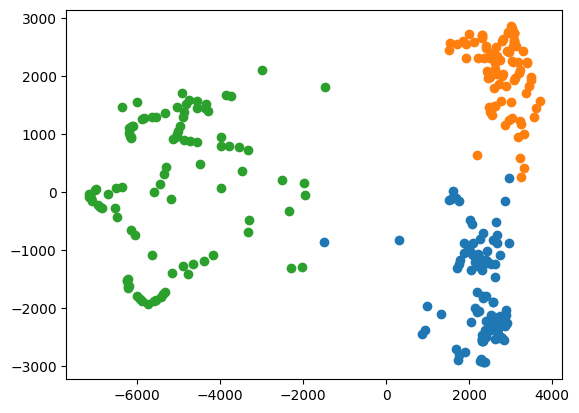

In [31]:
# 장점: 만개 특성은 그래프화 어려움 -> 근데 주성분 학습으로 특성 줄이면 그래프 그리기 용이
for label in range(3):
    data = fruits_pca[km.labels_==label] # 라벨에 따라 구분??
    plt.scatter(data[:, 0], data[:, 1]) # x축 = 모든 데이터의 0번째, y축 = 모든 데이터의 1번째 값 넣어 산포도

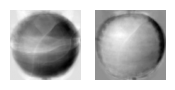

In [32]:
draw_fruits(pca.components_.reshape(-1, 100, 100))